# Basi territoriali e variabili censuarie
https://www.istat.it/it/archivio/104317

## confini amministrativi
https://www.istat.it/it/archivio/222527

![tabella_confini_istat](img/tabella_confini_istat.png)

### confini
versione non generalizzata al 2018 - proiezione WGS84 UTM32N **[EPSG:32632](https://epsg.io/32632)**

http://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012018.zip

In [1]:
import requests
import zipfile
import io

In [2]:
zipconfini="http://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012018.zip"
r = requests.get(zipconfini)

In [3]:
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

questo genera la cartella _"Limiti01012018"_ che a sua volta contiene:

- _Com01012018_ : confini comunali
- _ProvCM01012018_ : confini provinciali
- _Reg01012018_ : confini regionali
- _RipGeo01012018_ : ripartizioni geografiche

Totale 108 Mb

# Geopandas

In [4]:
import geopandas as gpd
import os
%matplotlib inline

caricamento del file RipGeo01012018

In [5]:
ripartizioni_geografiche = gpd.read_file("Limiti01012018" + os.sep + "RipGeo01012018" + os.sep + "RipGeo01012018.shp")

## leggere il contenuto

In [6]:
ripartizioni_geografiche

,COD_RIP,DEN_RIP,SHAPE_Leng,SHAPE_Area,geometry
0,2,Nord-Est,2.533131e+06,6.232594e+10,(POLYGON ((852603.4834000003 5080093.183700001...
1,1,Nord-Ovest,2.671559e+06,5.792678e+10,"(POLYGON ((459010.2297999999 4906246.5803, 458..."
2,3,Centro,2.407106e+06,5.808371e+10,"(POLYGON ((625766.3239000002 4754785.0197, 625..."
3,5,Isole,3.860050e+06,4.993163e+10,"(POLYGON ((1054330.9396 4140712.709000001, 105..."
4,4,Sud,3.118909e+06,7.379777e+10,(POLYGON ((930273.4244999997 4714737.742000001...


## visualizzare la mappa

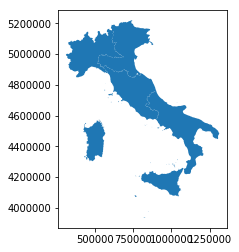

In [7]:
ripartizioni_geografiche.plot()

## assegnare un colore ad ogni area

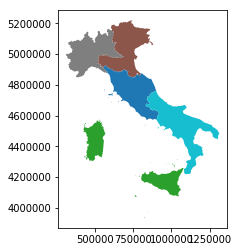

In [8]:
ripartizioni_geografiche.plot(column='DEN_RIP')

## aggiungere la legenda

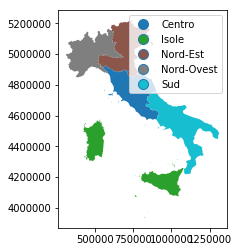

In [9]:
ripartizioni_geografiche.plot(column='DEN_RIP',legend=True)

## allargare la mappa scegliendo le dimensioni di x e y in pollici

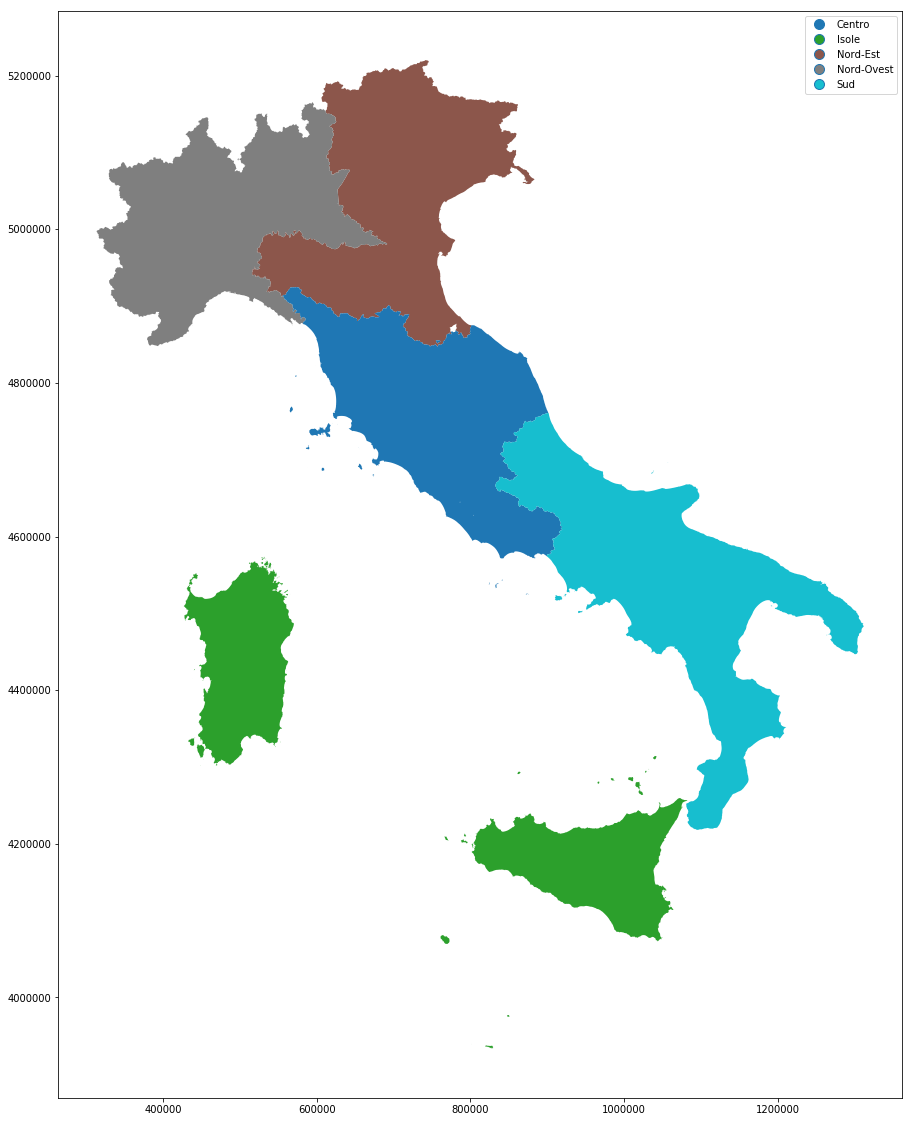

In [10]:
ripartizioni_geografiche.plot(column='DEN_RIP',legend=True,figsize=(20,20))

## cambiare la scala colori

per fare questo è opportuno scegliere la scala colori fra [quelle offerte da maptplotlib](https://matplotlib.org/users/colormaps.html) 

In questo caso conviene [scegliere](https://matplotlib.org/users/colormaps.html#list-colormaps) fra quelle di scala divergente 
![divergente](https://matplotlib.org/_images/grayscale_01_03.png)


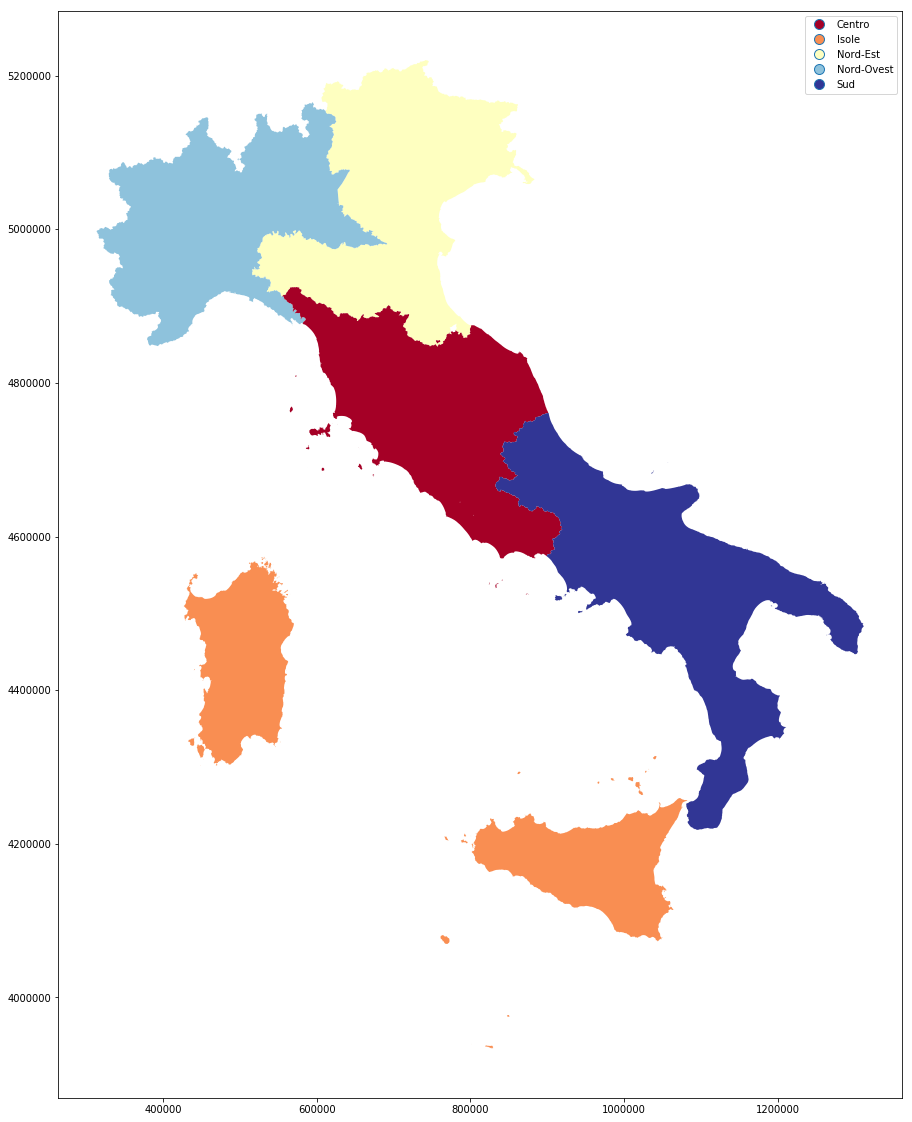

In [11]:
ripartizioni_geografiche.plot(column='DEN_RIP',legend=True,figsize=(20,20),cmap="RdYlBu")

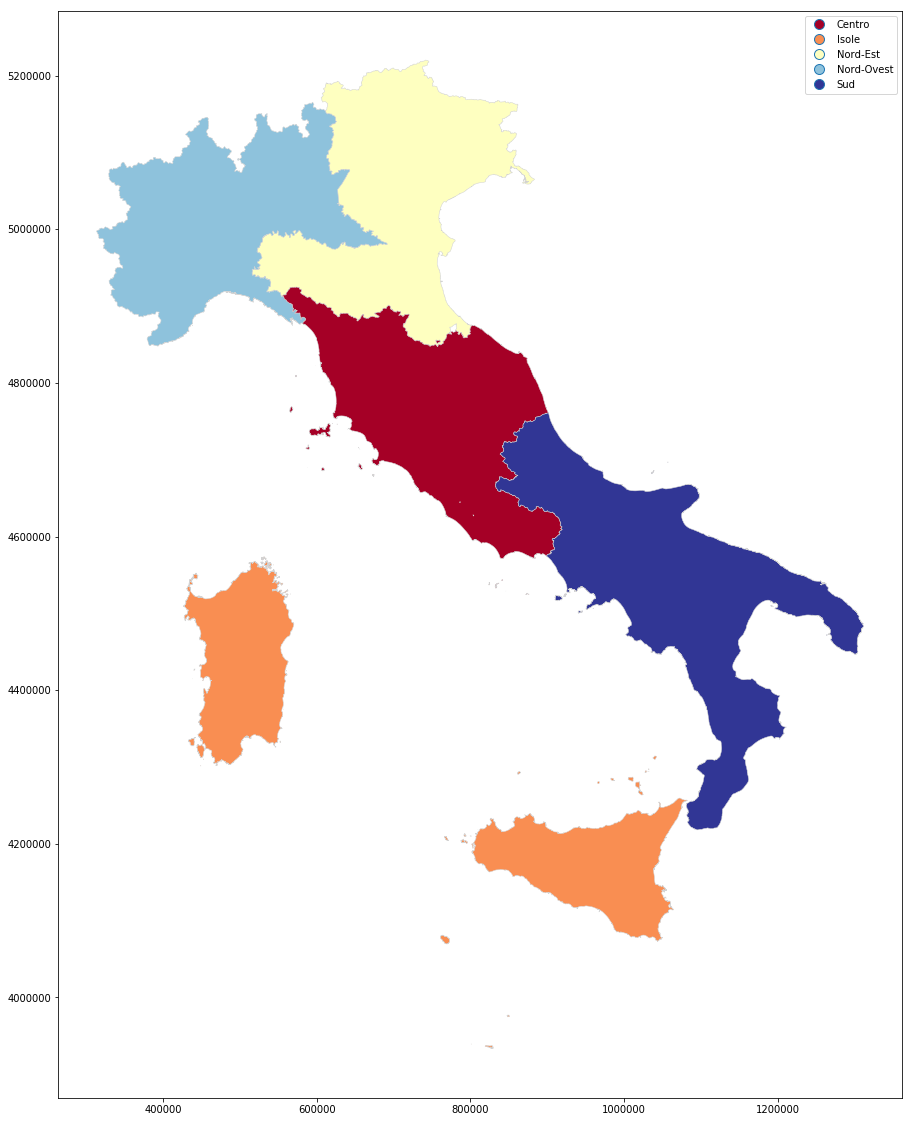

In [12]:
ripartizioni_geografiche.plot(column='DEN_RIP',legend=True,figsize=(20,20),cmap="RdYlBu", edgecolor = "lightgrey", linewidth = 0.5)

## creare un nuovo vettore di punti con delle coordinate significative con i nomi delle ripartizioni

posso scegliere il centroide

In [13]:
ripartizioni_geografiche.centroid

0    POINT (701955.0400406007 5039877.207536004)
1    POINT (478144.2626602718 5011450.499354753)
2    POINT (756706.1939528083 4757681.301710429)
3    POINT (736510.8126530694 4300289.284363961)
4     POINT (1061529.19722656 4529724.360734882)
dtype: object

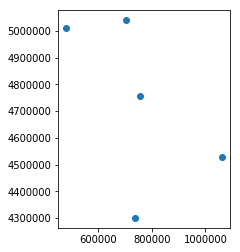

In [14]:
ripartizioni_geografiche.centroid.plot()

o un punto rappresentativo 

In [15]:
ripartizioni_geografiche.representative_point()

0     POINT (696177.6980534061 5033674.6388)
1    POINT (498289.3859768431 5006600.53385)
2    POINT (757542.6437202122 4748065.48845)
3     POINT (942181.712401716 4166109.38245)
4     POINT (1085274.088699356 4489491.1233)
dtype: object

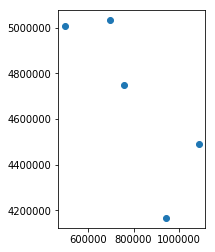

In [16]:
ripartizioni_geografiche.representative_point().plot()

per aggiungere ai punti le etichette ho bisogno di trasformare la serie in un geodataframe usando l'indice come chiave di collegamento

In [17]:
punti_rappresentativi = gpd.GeoDataFrame(ripartizioni_geografiche.representative_point()).reset_index()

In [18]:
punti_rappresentativi.columns

Index(['index', 0], dtype='object')

il geodataframe creato non ha un colonna di tipo 'geometry', infatti, se si prova a disegnarlo, da errore

No geometry data set yet (expected in column 'geometry'.


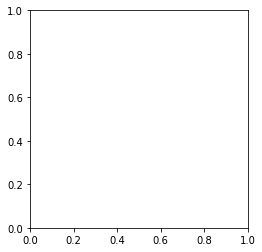

In [19]:
try:
    punti_rappresentativi.plot()
except Exception as e:
    print(e)

è quindi necessario assegnare la colonna 'geometry'

In [20]:
punti_rappresentativi = punti_rappresentativi.rename(columns={0:'geometry'}).set_geometry('geometry')

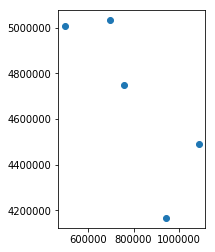

In [21]:
punti_rappresentativi.plot()

In [22]:
punti_rappresentativi

,index,geometry
0,0,POINT (696177.6980534061 5033674.6388)
1,1,POINT (498289.3859768431 5006600.53385)
2,2,POINT (757542.6437202122 4748065.48845)
3,3,POINT (942181.712401716 4166109.38245)
4,4,POINT (1085274.088699356 4489491.1233)


aggiungiamo le etichette usando "index" come chiave comiciando a creare un DataFrame

In [23]:
etichette = ripartizioni_geografiche.DEN_RIP.to_frame().reset_index()

ora è possibile unire i due dataframe

In [24]:
punti_rappresentativi = punti_rappresentativi.merge(etichette,on="index")

rinomino "DEN_RIP" in "etichette"

In [25]:
punti_rappresentativi = punti_rappresentativi.rename(columns={'DEN_RIP':'etichette'})

In [26]:
punti_rappresentativi

,index,geometry,etichette
0,0,POINT (696177.6980534061 5033674.6388),Nord-Est
1,1,POINT (498289.3859768431 5006600.53385),Nord-Ovest
2,2,POINT (757542.6437202122 4748065.48845),Centro
3,3,POINT (942181.712401716 4166109.38245),Isole
4,4,POINT (1085274.088699356 4489491.1233),Sud


In [27]:
import matplotlib.pyplot as plt

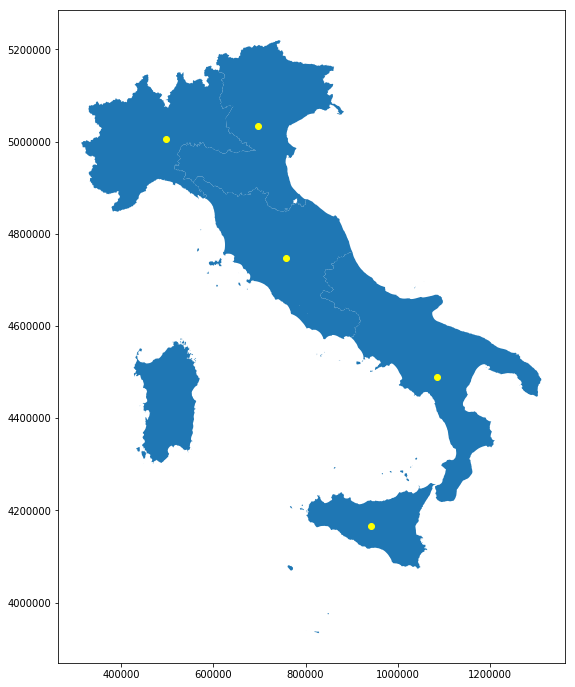

In [28]:
f, ax = plt.subplots(1,figsize = (15, 12))
ripartizioni_geografiche.plot(ax=ax,figsize=(200,200))
punti_rappresentativi.plot(ax=ax,color='yellow')
plt.show()

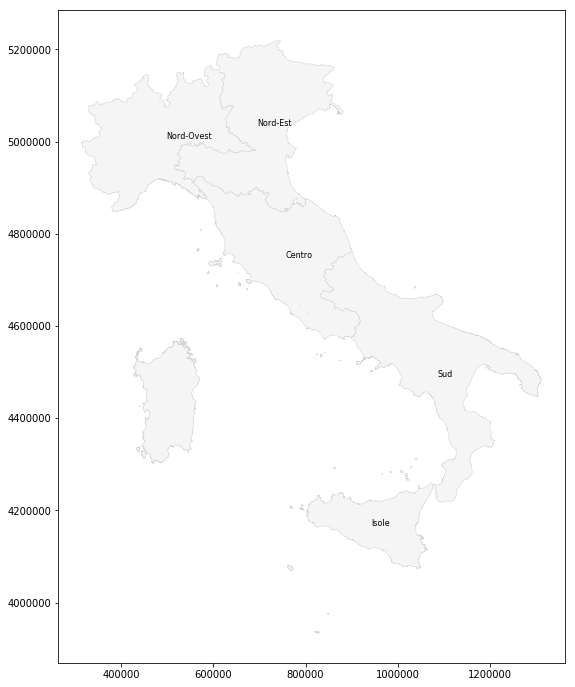

In [29]:
ax = ripartizioni_geografiche.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(punti_rappresentativi.geometry.x, punti_rappresentativi.geometry.y, punti_rappresentativi["etichette"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

## usare il geocoder

geopandas si appoggia a [geopy](https://geopy.readthedocs.io/en/stable/)

In [30]:
colonne = ['nome_citta']
citta = [('Roma'),('Palermo'),('Trento'),('Genova'),('Bari'),('Trieste'),('Napoli'),('Cagliari'),('Messina'),('Lecce')]
elenco_citta = gpd.GeoDataFrame(citta,columns=colonne)

In [31]:
elenco_citta

,nome_citta
0,Roma
1,Palermo
2,Trento
3,Genova
4,Bari
5,Trieste
6,Napoli
7,Cagliari
8,Messina
9,Lecce


In [32]:
geoelenco_citta = gpd.tools.geocode(elenco_citta.nome_citta, provider="arcgis")


In [33]:
geoelenco_citta

,geometry,address
0,POINT (12.49565000000007 41.90322000000003),Roma
1,POINT (13.36112000000003 38.12207000000006),Palermo
2,POINT (11.11926000000005 46.07005000000004),Trento
3,POINT (8.938980000000072 44.41039000000006),Genova
4,POINT (16.86666000000002 41.12587000000008),Bari
5,POINT (13.77269000000007 45.65757000000008),Trieste
6,POINT (14.25226000000004 40.84014000000008),Napoli
7,POINT (9.110490000000027 39.21454000000006),Cagliari
8,POINT (15.55308000000002 38.17837000000003),Messina
9,POINT (18.16801000000004 40.35795000000007),Lecce


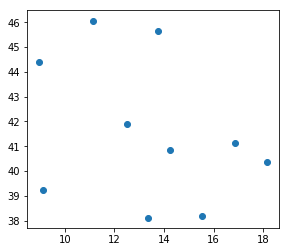

In [34]:
geoelenco_citta.plot()

## convertire le coordinate

In [35]:
geoelenco_citta.crs = {'init':'epsg:4326'}

In [36]:
geoelenco_citta.geometry

0    POINT (12.49565000000007 41.90322000000003)
1    POINT (13.36112000000003 38.12207000000006)
2    POINT (11.11926000000005 46.07005000000004)
3    POINT (8.938980000000072 44.41039000000006)
4    POINT (16.86666000000002 41.12587000000008)
5    POINT (13.77269000000007 45.65757000000008)
6    POINT (14.25226000000004 40.84014000000008)
7    POINT (9.110490000000027 39.21454000000006)
8    POINT (15.55308000000002 38.17837000000003)
9    POINT (18.16801000000004 40.35795000000007)
Name: geometry, dtype: object

In [37]:
ripartizioni_geografiche.geometry

0    (POLYGON ((852603.4834000003 5080093.183700001...
1    (POLYGON ((459010.2297999999 4906246.5803, 458...
2    (POLYGON ((625766.3239000002 4754785.0197, 625...
3    (POLYGON ((1054330.9396 4140712.709000001, 105...
4    (POLYGON ((930273.4244999997 4714737.742000001...
Name: geometry, dtype: object

In [38]:
ripartizioni_geografiche.crs = {'init':'epsg:32632'}

In [39]:
ripartizioni_geografiche.geometry

0    (POLYGON ((852603.4834000003 5080093.183700001...
1    (POLYGON ((459010.2297999999 4906246.5803, 458...
2    (POLYGON ((625766.3239000002 4754785.0197, 625...
3    (POLYGON ((1054330.9396 4140712.709000001, 105...
4    (POLYGON ((930273.4244999997 4714737.742000001...
Name: geometry, dtype: object

In [40]:
geoelenco_citta = geoelenco_citta.to_crs(epsg=32632)

In [41]:
geoelenco_citta

,geometry,address
0,POINT (789959.3580577425 4644942.382691314),Roma
1,POINT (882347.6057081512 4228352.002178628),Palermo
2,POINT (663890.6535953074 5104013.957498243),Trento
3,POINT (495141.6231543393 4917457.408282457),Genova
4,POINT (1160616.911134471 4582659.173878244),Bari
5,POINT (871823.8818152584 5067090.488763754),Trieste
6,POINT (942879.0457661359 4534306.116466856),Napoli
7,POINT (509538.5639221078 4340590.57150848),Cagliari
8,POINT (1074243.110497063 4245953.958764161),Messina
9,POINT (1279009.503048473 4508035.316408172),Lecce


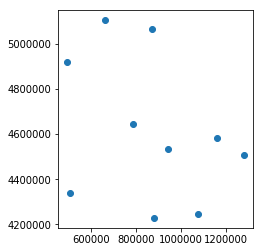

In [42]:
geoelenco_citta.plot()

## controllare se un punto appartiene ad una area

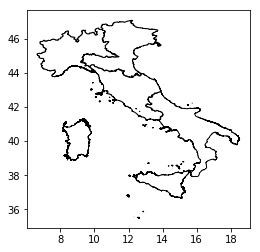

In [43]:
fig, ax = plt.subplots()
ripartizioni_geografiche.to_crs({"init": "epsg:4326"}).plot(ax=ax, color="white", edgecolor="black");

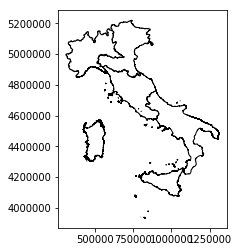

In [44]:
fig, ax = plt.subplots()
ripartizioni_geografiche.plot(ax=ax, color="white", edgecolor="black");

In [45]:
geoelenco_citta.plot(ax=ax,color="red")

<Figure size 432x288 with 0 Axes>

In [46]:
for indiceripartizione in ripartizioni_geografiche.index:
    ripartizione = ripartizioni_geografiche.loc[indiceripartizione]
    for indicecitta in geoelenco_citta.index:
        citta = geoelenco_citta.loc[indicecitta]
        if citta.geometry.intersects(ripartizione.geometry) == True:
            print(citta.address)
            print(ripartizione.DEN_RIP)

Trento
Nord-Est
Trieste
Nord-Est
Genova
Nord-Ovest
Roma
Centro
Palermo
Isole
Cagliari
Isole
Messina
Isole
Bari
Sud
Napoli
Sud
Lecce
Sud


In [47]:
import pandas as pd
#  Popolazione residente al 1° gennaio da ISTAT
popolazione_regioni_italiane_2018 = pd.read_csv('data' + os.sep + "DCIS_POPRES1_07022019152401769.csv")

In [48]:
regioni_2018 = gpd.read_file('Limiti01012018' + os.sep + 'Reg01012018' + os.sep + 'Reg01012018.shp')

In [49]:
popolazione_regioni_italiane_2018

,ITTER107,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITC1,Piemonte,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,1,nubile/celibe,2018,2018,15535,NaN,NaN
1,ITC1,Piemonte,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,99,totale,2018,2018,15535,NaN,NaN
2,ITC1,Piemonte,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,1,nubile/celibe,2018,2018,15040,NaN,NaN
3,ITC1,Piemonte,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,99,totale,2018,2018,15040,NaN,NaN
4,ITC1,Piemonte,JAN,popolazione al 1º gennaio,9,totale,Y0,0 anni,1,nubile/celibe,2018,2018,30575,NaN,NaN
5,ITC1,Piemonte,JAN,popolazione al 1º gennaio,9,totale,Y0,0 anni,99,totale,2018,2018,30575,NaN,NaN
6,ITC2,Valle d'Aosta / Vallée d'Aoste,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,1,nubile/celibe,2018,2018,478,NaN,NaN
7,ITC2,Valle d'Aosta / Vallée d'Aoste,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,99,totale,2018,2018,478,NaN,NaN
8,ITC2,Valle d'Aosta / Vallée d'Aoste,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,1,nubile/celibe,2018,2018,419,NaN,NaN
9,ITC2,Valle d'Aosta / Vallée d'Aoste,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,99,totale,2018,2018,419,NaN,NaN


In [50]:
popolazione_regioni_italiane_2018.Territorio.unique()

array(['Piemonte', "Valle d'Aosta / Vallée d'Aoste", 'Liguria',
       'Lombardia', 'Trentino Alto Adige / Südtirol', 'Veneto',
       'Friuli-Venezia Giulia', 'Emilia-Romagna', 'Toscana', 'Umbria',
       'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia',
       'Basilicata', 'Calabria', 'Sicilia', 'Sardegna'], dtype=object)

In [51]:
regioni_2018.head()

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,3,12,Lazio,1.201765e+06,1.723172e+10,(POLYGON ((769745.5108000003 4625758.608899999...
1,4,17,Basilicata,6.757507e+05,1.007311e+10,"(POLYGON ((1077662.7428 4576824.821, 1077714.0..."
2,1,3,Lombardia,1.511132e+06,2.386310e+10,"(POLYGON ((595652.3579000002 5163515.658, 5958..."
3,4,13,Abruzzo,6.645380e+05,1.083150e+10,(POLYGON ((930273.4244999997 4714737.742000001...
4,4,14,Molise,4.711976e+05,4.460437e+09,"POLYGON ((979228.8426000001 4673419.6483, 9792..."


In [52]:
popolazione_regioni_italiane_2018 = popolazione_regioni_italiane_2018.rename(columns={'Territorio':'DEN_REG'})

In [53]:
popolazione_regioni_italiane_2018.DEN_REG.unique()

array(['Piemonte', "Valle d'Aosta / Vallée d'Aoste", 'Liguria',
       'Lombardia', 'Trentino Alto Adige / Südtirol', 'Veneto',
       'Friuli-Venezia Giulia', 'Emilia-Romagna', 'Toscana', 'Umbria',
       'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia',
       'Basilicata', 'Calabria', 'Sicilia', 'Sardegna'], dtype=object)

In [54]:
regioni_2018.DEN_REG.unique()

array(['Lazio', 'Basilicata', 'Lombardia', 'Abruzzo', 'Molise', 'Marche',
       'Liguria', "Valle d'Aosta", 'Umbria', 'Campania', 'Toscana',
       'Piemonte', 'Calabria', 'Puglia', 'Veneto',
       'Friuli Venezia Giulia', 'Emilia-Romagna', 'Trentino-Alto Adige',
       'Sicilia', 'Sardegna'], dtype=object)

In [55]:
indici_taa = popolazione_regioni_italiane_2018[popolazione_regioni_italiane_2018.DEN_REG == 'Trentino Alto Adige / Südtirol'].index

In [56]:
for i in indici_taa:
    popolazione_regioni_italiane_2018.at[i,'DEN_REG'] = 'Trentino-Alto Adige'


In [57]:
indici_fvg = popolazione_regioni_italiane_2018[popolazione_regioni_italiane_2018.DEN_REG == 'Friuli-Venezia Giulia'].index

In [58]:
for i in indici_fvg:
    popolazione_regioni_italiane_2018.at[i,'DEN_REG'] = 'Friuli Venezia Giulia'

In [59]:
indici_vda = popolazione_regioni_italiane_2018[popolazione_regioni_italiane_2018.DEN_REG == "Valle d'Aosta / Vallée d'Aoste"].index

In [60]:
for i in indici_vda:
    popolazione_regioni_italiane_2018.at[i,'DEN_REG'] = "Valle d'Aosta"

In [61]:
popolazione_regioni_italiane_2018.DEN_REG.unique()

array(['Piemonte', "Valle d'Aosta", 'Liguria', 'Lombardia',
       'Trentino-Alto Adige', 'Veneto', 'Friuli Venezia Giulia',
       'Emilia-Romagna', 'Toscana', 'Umbria', 'Marche', 'Lazio',
       'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata',
       'Calabria', 'Sicilia', 'Sardegna'], dtype=object)

In [62]:
regioni_2018.DEN_REG

0                     Lazio
1                Basilicata
2                 Lombardia
3                   Abruzzo
4                    Molise
5                    Marche
6                   Liguria
7             Valle d'Aosta
8                    Umbria
9                  Campania
10                  Toscana
11                 Piemonte
12                 Calabria
13                   Puglia
14                   Veneto
15    Friuli Venezia Giulia
16           Emilia-Romagna
17      Trentino-Alto Adige
18                  Sicilia
19                 Sardegna
Name: DEN_REG, dtype: object

In [148]:
totale_popolazione_regioni = popolazione_regioni_italiane_2018[(popolazione_regioni_italiane_2018.Sesso=='totale') & (popolazione_regioni_italiane_2018['Stato civile'] =='totale') & (popolazione_regioni_italiane_2018.Età == 'totale')] 

In [151]:
geo_popolazione_regione = regioni_2018.merge(totale_popolazione_regioni,on="DEN_REG").reset_index()

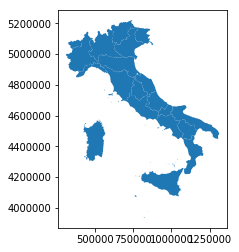

In [152]:
geo_popolazione_regione.plot()

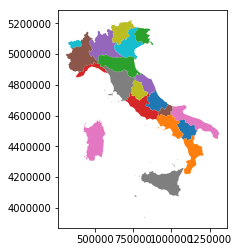

In [153]:
geo_popolazione_regione.plot(column='DEN_REG')

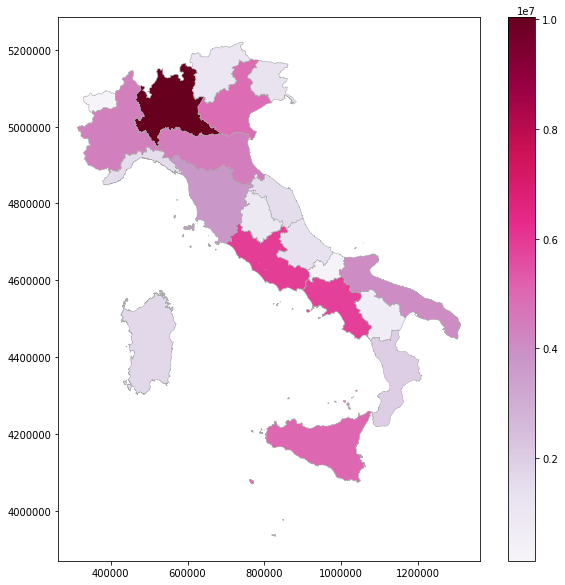

In [154]:
geo_popolazione_regione.plot(column='Value',cmap="PuRd", legend=True,edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [155]:
import pysal as pi

In [156]:
cinqueintervalli=pi.viz.mapclassify.Equal_Interval(geo_popolazione_regione.Value,k=4)

In [157]:
cinqueintervalli.yb

array([2, 0, 3, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

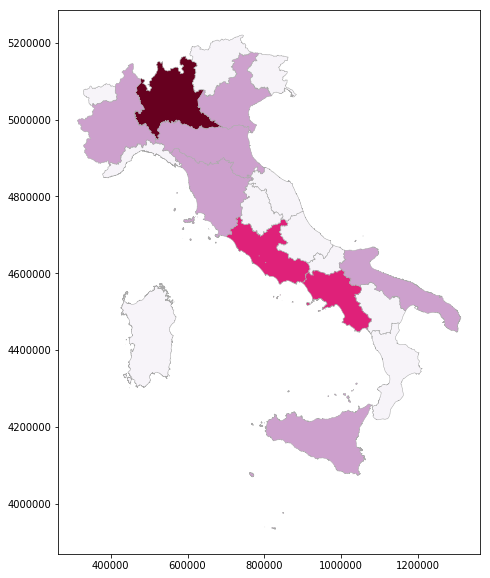

In [158]:
geo_popolazione_regione.assign(cl=cinqueintervalli.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [159]:
quantili=pi.viz.mapclassify.Quantiles(geo_popolazione_regione.Value)

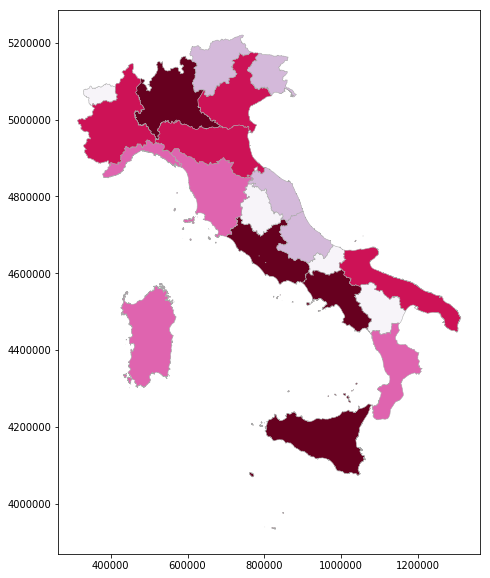

In [160]:
geo_popolazione_regione.assign(cl=quantili.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [161]:
geo_popolazione_regione.columns

Index(['index', 'COD_RIP', 'COD_REG', 'DEN_REG', 'Shape_Leng', 'Shape_Area',
       'geometry', 'ITTER107', 'TIPO_DATO15', 'Tipo di indicatore demografico',
       'SEXISTAT1', 'Sesso', 'ETA1', 'Età', 'STATCIV2', 'Stato civile', 'TIME',
       'Seleziona periodo', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [162]:
natural_breaks=pi.viz.mapclassify.Natural_Breaks(geo_popolazione_regione.Value)

In [163]:
percentile=pi.viz.mapclassify.Percentiles(geo_popolazione_regione.Value)

In [164]:
fisher_jenks=pi.viz.mapclassify.Fisher_Jenks(geo_popolazione_regione.Value)

In [165]:
geo_popolazione_regione = geo_popolazione_regione.assign(fisher_jenks=fisher_jenks.yb,percentile=percentile.yb,quantili=quantili.yb,natural_breaks=natural_breaks.yb)

In [166]:
geo_popolazione_regione.head()

,index,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,ITTER107,TIPO_DATO15,Tipo di indicatore demografico,...,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags,fisher_jenks,percentile,quantili,natural_breaks
0,0,3,12,Lazio,1.201765e+06,1.723172e+10,(POLYGON ((769745.5108000003 4625758.608899999...,ITE4,JAN,popolazione al 1º gennaio,...,totale,2018,2018,5896693,NaN,NaN,3,4,4,3
1,1,4,17,Basilicata,6.757507e+05,1.007311e+10,"(POLYGON ((1077662.7428 4576824.821, 1077714.0...",ITF5,JAN,popolazione al 1º gennaio,...,totale,2018,2018,567118,NaN,NaN,0,2,0,0
2,2,1,3,Lombardia,1.511132e+06,2.386310e+10,"(POLYGON ((595652.3579000002 5163515.658, 5958...",ITC4,JAN,popolazione al 1º gennaio,...,totale,2018,2018,10036258,NaN,NaN,4,5,4,4
3,3,4,13,Abruzzo,6.645380e+05,1.083150e+10,(POLYGON ((930273.4244999997 4714737.742000001...,ITF1,JAN,popolazione al 1º gennaio,...,totale,2018,2018,1315196,NaN,NaN,1,2,1,1
4,4,4,14,Molise,4.711976e+05,4.460437e+09,"POLYGON ((979228.8426000001 4673419.6483, 9792...",ITF2,JAN,popolazione al 1º gennaio,...,totale,2018,2018,308493,NaN,NaN,0,1,0,0


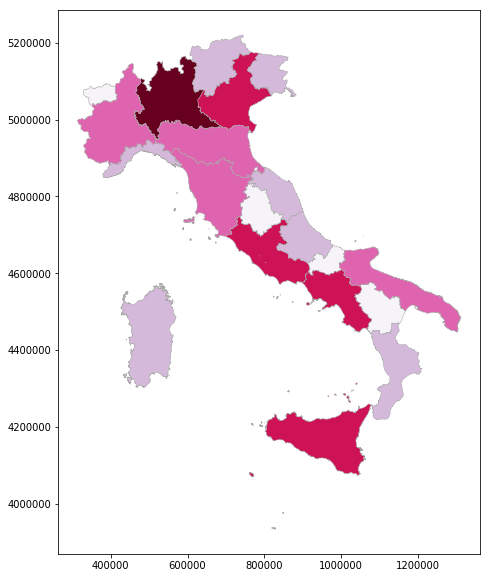

In [167]:
geo_popolazione_regione.plot(column='natural_breaks',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

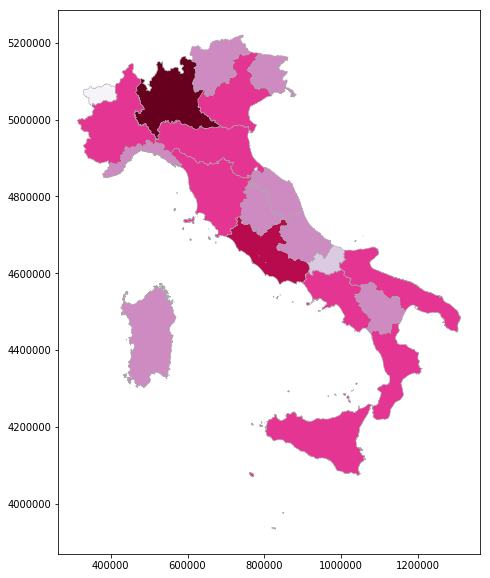

In [168]:
geo_popolazione_regione.plot(column='percentile',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [174]:
geo_popolazione_regione.sort_values('Value',ascending=False).DEN_REG

2                 Lombardia
0                     Lazio
9                  Campania
18                  Sicilia
14                   Veneto
16           Emilia-Romagna
11                 Piemonte
13                   Puglia
10                  Toscana
12                 Calabria
19                 Sardegna
6                   Liguria
5                    Marche
3                   Abruzzo
15    Friuli Venezia Giulia
17      Trentino-Alto Adige
8                    Umbria
1                Basilicata
4                    Molise
7             Valle d'Aosta
Name: DEN_REG, dtype: object

In [175]:
natural_breaks.bins

array([  884640.,  1956687.,  4452629.,  5896693., 10036258.])